#### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import torch
import seaborn as sns
import time
from PIL import Image
import cv2
import os
import shutil
import albumentations as A
import glob
import pytesseract as pt
%matplotlib inline

pt.pytesseract.tesseract_cmd = r"C:\Users\mistr\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

#### Checking Data

In [ ]:
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2

def make_rectangle(x,y,w,h):
    
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1
            
        return cv2.rectangle(img, (l, t), (r, b), color, thickness)
    

In [ ]:
data = r"C:\Users\mistr\Trash_Detection\dataset\combine_train_data\train\images\01dae35bbed98f4c2c11ddbb90809bad_jpg.rf.8ab00b8109130dbcd5eb02659fbd1799.jpg"
label = r"C:\Users\mistr\Trash_Detection\dataset\combine_train_data\train\labels\01dae35bbed98f4c2c11ddbb90809bad_jpg.rf.8ab00b8109130dbcd5eb02659fbd1799.txt"
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(data)
dh, dw, _ = img.shape

fl = open(label, 'r')
data = fl.readlines()
fl.close()



for dt in data:

    # Split string to float
    _, x, y, w, h = map(float, dt.split(' '))
    make_rectangle(x,y,w,h)

plt.imshow(img)

#### Data preprocessing

In [ ]:
dataset_path = os.path.join(os.getcwd(), "trash_detection\dataset") 

In [ ]:
# class 0 : trash-box , class 1: trash-plastic
def clean_label(image_data,label):
    with open(label) as file:
        file.seek(0)
        data = file.readlines()
        file.close()
        label_text_list = []
        for dt in data:
            if not dt:
                continue
            if len(dt.split(" ")) == 5: 
                classname, center_x, center_y, w, h = map(float, dt.split(' '))
                label_text = f'{classname} {center_x} {center_y} {w} {h}'
                label_text_list.append(label_text + "\n")

        if os.stat(label).st_size !=0:
        
            with open(label,"w") as file:
                file.writelines(label_text_list)
                file.close()
        else:
            file_name = os.path.splitext(os.path.basename(label))[0]
            os.remove(label)
#             os.remove(os.path.join(image_data,file_name +".JPG"))

# run bottom two lines to change annotations for all files!
# cleaning_data = r"C:\Users\mistr\yolov5\cleanest_data\labels\valid"
# image_data = r"C:\Users\mistr\yolov5\cleanest_data\images\valid"
# for label in os.listdir(cleaning_data):
#     clean_label(image_data,os.path.join(cleaning_data,label))

# clean_label(r"C:\Users\mistr\OneDrive\Desktop\17462544_9054193_0062_jpg.rf.d19131aa59d17acdbdf3b0aac4a114f7.txt")

In [ ]:
### cleaned_data_2 files 
def clean_label_extra(label):
    with open(label) as file:
        file.seek(0)
        data = file.readlines()
        file.close()
        label_text_list = []
        for dt in data:
            if not dt:
                continue
            if len(dt.split(" ")) == 5: 
                classname, center_x, center_y, w, h = map(float, dt.split(' '))
                if classname == 1:
                    label_text_list.append(" "+"\n")
                    continue
                if classname ==2:
                    classname =1
                label_text = f'{classname} {center_x} {center_y} {w} {h}'
                label_text_list.append(label_text + "\n")

            
        with open(label,"w") as file:
            file.writelines(label_text_list)
            file.close()

# clean_label(r"C:\Users\mistr\OneDrive\Desktop\mdc_photo_cdv_photo_001_1459620646640_jpg.rf.dced8d31ab0a6a6908648e7ff6d96994.txt")
# # run bottom three lines to change annotations for all files!
# cleaning_data = r"C:\Users\mistr\yolov5\cleaned_data_2\labels\valid"
# for label in os.listdir(cleaning_data):
#     clean_label_extra(os.path.join(cleaning_data,label))

In [ ]:
#### Abandoned files 
def clean_label_abandoned(label):
    with open(label) as file:
        file.seek(0)
        data = file.readlines()
        file.close()
        label_text_list = []
        remove_classes = [1,2,3,4,5,11,12,13,14,15,19,20,21,22]
        for dt in data:
            if not dt:
                continue
            if len(dt.split(" ")) == 5: 
                classname, center_x, center_y, w, h = map(float, dt.split(' '))
                if classname in remove_classes:
                    label_text_list.append(" "+"\n")
                    continue
                if classname ==16:
                    classname =1
                if classname ==6:
                    classname =2
                if classname ==7:
                    classname =3
                if classname ==8:
                    classname =4
                if classname ==9:
                    classname =5
                if classname ==10:
                    classname =6
                if classname ==17:
                    classname =8
                if classname ==18:
                    classname =9
                label_text = f'{classname} {center_x} {center_y} {w} {h}'
                label_text_list.append(label_text + "\n")

            
        with open(label,"w") as file:
            file.writelines(label_text_list)
            file.close()

clean_label_abandoned(r"C:\Users\mistr\OneDrive\Desktop\17462544_9054193_0062_jpg.rf.d19131aa59d17acdbdf3b0aac4a114f7.txt")
# run bottom three lines to change annotations for all files!
# cleaning_data = r"C:\Users\mistr\yolov5\abandoned_data_2\labels\valid"
# for label in os.listdir(cleaning_data):
#     clean_label_abandoned(os.path.join(cleaning_data,label))

In [ ]:
def clean_label_abandoned_extra(label):
    with open(label) as file:
        file.seek(0)
        data = file.readlines()
        file.close()
        label_text_list = []
        remove_classes = [2,3,5]
        for dt in data:
            if not dt:
                continue
            if len(dt.split(" ")) == 5: 
                classname, center_x, center_y, w, h = map(float, dt.split(' '))
                if classname in remove_classes:
                    label_text_list.append(" "+"\n")
                    continue
                if classname==4:
                    classname =2 
#                 if classname==5:
#                     classname =4
#                 if classname==6:
#                     classname=5
                label_text = f'{classname} {center_x} {center_y} {w} {h}'
                label_text_list.append(label_text + "\n")

            
        with open(label,"w") as file:
            file.writelines(label_text_list)
            file.close()

            
cleaning_data = r"C:\Users\mistr\yolov5\cleanest_data\labels\valid"
for label in os.listdir(cleaning_data):
    clean_label_abandoned_extra(os.path.join(cleaning_data,label))            

In [ ]:
os.stat(r"C:\Users\mistr\OneDrive\Desktop\labels\valid\16055718_9015072_0025_jpg.rf.65d0195c0ffdaf1dca5d9a1dd9fcafd5.txt").st_size ==0

In [ ]:
cleaning_data = r"C:\Users\mistr\yolov5\cleaned_data_3\labels\valid"
image_data = r"C:\Users\mistr\yolov5\cleaned_data_3\images\valid"
for label in os.listdir(cleaning_data):
    clean_label(image_data,os.path.join(cleaning_data,label))

In [ ]:
def mapping_cleanlabel(label):
    with open(label) as file:
        file.seek(0)
        data = file.readlines()
        file.close()
        label_text_list = []
        for dt in data:
            if not dt:
                continue
            if len(dt.split(" ")) == 5: 
                classname, center_x, center_y, w, h = map(float, dt.split(' '))

                if classname==1:
                    classname =5 
                if classname==2:
                    classname =4
                if classname==3:
                    classname=2
                if classname==4:
                    classname=1
                if classname ==5:
                    classname==3
                label_text = f'{classname} {center_x} {center_y} {w} {h}'
                label_text_list.append(label_text + "\n")

            
        with open(label,"w") as file:
            file.writelines(label_text_list)
            file.close()
mapping_data = r"C:\Users\mistr\Downloads\new_new.v2i.yolov5pytorch\valid\labels"
for label in os.listdir(mapping_data):
    mapping_cleanlabel(os.path.join(mapping_data,label))           

In [ ]:
#merge dataset into one folder
def data_merge(dataset_path):
    for dataset_list in os.listdir(dataset_path):

        train_images = os.path.join(dataset_path, dataset_list + "\\train\images")
        train_labels = os.path.join(dataset_path, dataset_list + "\\train\labels")
        valid_images = os.path.join(dataset_path, dataset_list + "\\valid\images")
        valid_labels = os.path.join(dataset_path, dataset_list + "\\valid\labels")
        test_images  = os.path.join(dataset_path, dataset_list + "\\test\images")
        test_labels  = os.path.join(dataset_path, dataset_list + "\\test\labels")


        directory = "combine_train_data"
        new_directory = os.path.join(dataset_path , directory)
        if not os.path.exists(new_directory):
            os.makedirs(new_directory)
        

        for images in os.listdir(train_images):
            file_name = os.path.splitext(os.path.basename(os.path.join(train_images ,images)))[0] 
            

            if file_name + ".txt" in os.listdir(train_labels):
                label = os.path.join(train_labels, file_name + ".txt")
                if os.stat(label).st_size == 0:
                    continue
                image = cv2.imread(os.path.join(train_images,images))
                resized_img =  cv2.resize(image , (256 , 256))
                if os.path.exists(os.path.join(new_directory, "train")):
                        cv2.imwrite(os.path.join(new_directory+ "\\train\images" , images), resized_img)
                        shutil.copy(label, 
                                   os.path.join(new_directory + "\\train","labels"))
                else:
                    directory_train = "train"
                    new_train_dir = os.path.join(new_directory , directory_train)
                    os.makedirs(new_train_dir)
                    os.makedirs(os.path.join(new_train_dir , "images"))
                    cv2.imwrite(os.path.join(new_train_dir+ "\\images" , images), resized_img)
                    os.makedirs(os.path.join(new_train_dir, "labels"))
                    shutil.copy(label, 
                                   os.path.join(new_train_dir,"labels"))

        for images in os.listdir(valid_images):
            file_name = os.path.splitext(os.path.basename(os.path.join(valid_images ,images)))[0] 

            if file_name + ".txt" in os.listdir(valid_labels):
                label = os.path.join(valid_labels, file_name + ".txt")
                if os.stat(label).st_size == 0:
                    continue
                image = cv2.imread(os.path.join(valid_images,images))
                resized_img =  cv2.resize(image , (256 , 256))
                
                if os.path.exists(os.path.join(new_directory, "valid")):
                        cv2.imwrite(os.path.join(new_directory+ "\\valid\images" , images), resized_img)
                        shutil.copy(label, 
                                   os.path.join(new_directory + "\\valid","labels"))
                else:
                    directory_valid = "valid"
                    new_valid_dir = os.path.join(new_directory , directory_valid)
                    os.makedirs(new_valid_dir)
                    os.makedirs(os.path.join(new_valid_dir , "images"))
                    cv2.imwrite(os.path.join(new_valid_dir+ "\\images" , images), resized_img)
                    os.makedirs(os.path.join(new_valid_dir, "labels"))
                    shutil.copy(label, 
                                   os.path.join(new_valid_dir,"labels"))      

        for images in os.listdir(test_images):
            file_name = os.path.splitext(os.path.basename(os.path.join(test_images ,images)))[0] 

            if file_name + ".txt" in os.listdir(test_labels):
                label = os.path.join(test_labels, file_name + ".txt")
                if os.stat(label).st_size == 0:
                    continue
                image = cv2.imread(os.path.join(test_images,images))
                resized_img =  cv2.resize(image , (256 , 256))
                
                if os.path.exists(os.path.join(new_directory, "test")):
                        cv2.imwrite(os.path.join(new_directory+ "\\test\images" , images), resized_img)
                        shutil.copy(label, 
                                   os.path.join(new_directory + "\\test","labels"))
                else:
                    directory_test = "test"
                    new_test_dir = os.path.join(new_directory , directory_test)
                    os.makedirs(new_test_dir)
                    os.makedirs(os.path.join(new_test_dir , "images"))
                    cv2.imwrite(os.path.join(new_test_dir+ "\\images" , images), resized_img)
                    os.makedirs(os.path.join(new_test_dir, "labels"))
                    shutil.copy(label, 
                                   os.path.join(new_test_dir,"labels"))


dataset_path = os.path.join(os.getcwd(), "trash_detection\dataset")    
# run to merge dataset if not done already
# data_merge(dataset_path)

#### Albumentation

In [ ]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.Rotate(limit=40, p=0.9,border_mode= cv2.BORDER_CONSTANT),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.1),
    A.RandomBrightnessContrast(p=0.1),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.5),
        A.ColorJitter(p=0.5),
    ], p=1.0),
    
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

#### One example to test

In [ ]:
label = r"C:\Users\mistr\Trash_Detection\dataset\sampah.v2i.yolov5pytorch\train\labels\data-11_jpg.rf.d623cca68d5a93c08edb80f85152f0fc.txt"
test_bboxes_list = []
test_class_labels = []
with open(label) as file:
        file.seek(0)
        data = file.readlines()
        file.close
for dt in data:
    bboxes =  [float(s) for s in dt.split(' ') ]
    test_bboxes_list.append(bboxes[1:])
    test_class_labels.append(bboxes[0])
# bboxes_list,class_labels

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.imread(r"C:\Users\mistr\Trash_Detection\dataset\sampah.v2i.yolov5pytorch\train\images\data-11_jpg.rf.d623cca68d5a93c08edb80f85152f0fc.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
test_transformed = transform(image=image, bboxes=test_bboxes_list, class_labels = test_class_labels)
test_transformed_image = test_transformed['image']
test_transformed_bboxes = test_transformed['bboxes']

In [ ]:
test_transformed_bboxes

In [2]:
def draw_bboxes(img, bboxes):
    height, width = img.shape[:2]
    x, y, w, h = bboxes
    x *= width
    y *= height
    w *= width
    h *= height

    x1 = int(x - w / 2 + 1)
    x2 = int(x1 + w)
    y1 = int(y - h / 2 + 1)
    y2 = int(y1 + h)

    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), thickness=height // 100)


In [ ]:
for boxes in test_transformed_bboxes:
    draw_bboxes(test_transformed_image,boxes)

# draw_bboxes(transformed_image,transformed_bboxes)    
plt.imshow(test_transformed_image)

#### ON all training_data

In [ ]:
def relabel(label_list, classname_list):
    trans_label = []
    
    for index,label in enumerate(label_list):
        center_x,center_y,w,h = label
        classname =classname_list[index]
        trans_label.append(f'{classname}, {center_x}, {center_y}, {w}, {h}')
    return trans_label

In [ ]:
training_data = dataset_path + "/combine_train_data/train/images"
label_data = dataset_path + "/combine_train_data/train/labels"
image_data = []
bboxes_data = []
class_labels_list  = [] 
def transformation_on_all(training_data=training_data, label_data=label_data,image_data=image_data,
                          bboxes_data=bboxes_data,class_labels=class_labels_list):
    
    for images in os.listdir(training_data):
        bboxes_list = []
        class_labels = []
        image = cv2.imread(os.path.join(training_data, images))
        file_name = os.path.splitext(os.path.basename(os.path.join(training_data ,images)))[0] 
        label = os.path.join(label_data, file_name + ".txt")

        ## label file
        with open(label) as file:
            file.seek(0)
            data = file.readlines()
            file.close
        for dt in data:
            bboxes =  [float(s) for s in dt.split(' ') ]
            bboxes_list.append(bboxes[1:])
            class_labels.append(bboxes[0])

        #transforming
        transformed = transform(image=image, bboxes=bboxes_list, class_labels = class_labels)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        transformed_class_label = transformed["class_labels"]
        image_data.append(transformed_image)
        bboxes_data.append(transformed_bboxes)
        class_labels_list.append(transformed_class_label)

        ###saving 
        transform_file = file_name + "transformed"
        cv2.imwrite(os.path.join(training_data, transform_file+ ".JPG"),transformed_image)
        complete_file = os.path.join(label_data, transform_file + ".TXT")
        with open(complete_file, 'w') as file:
            transform_label = relabel(transformed_bboxes, transformed_class_label)
            for index in range(len(transform_label)):
                file.write(transform_label[index])
            file.close()
            
            
# transformation_on_all()

In [ ]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(25):
    plt.subplot(5,5,i+1)# the number of images in the grid is 5*5 (25)
    for boxes in bboxes_data[i]:
        draw_bboxes(image_data[i],boxes)
    plt.imshow(image_data[i])

plt.show()

In [21]:
image_data = r"C:\Users\mistr\yolov5\cleanest_data\images\train"
label_data = r"C:\Users\mistr\yolov5\cleanest_data\labels\train"

label = os.listdir(image_data)[0]
label

'16055742_9080569_0020_jpg.rf.88552d68489355161a1b571c6bfece08.jpg'

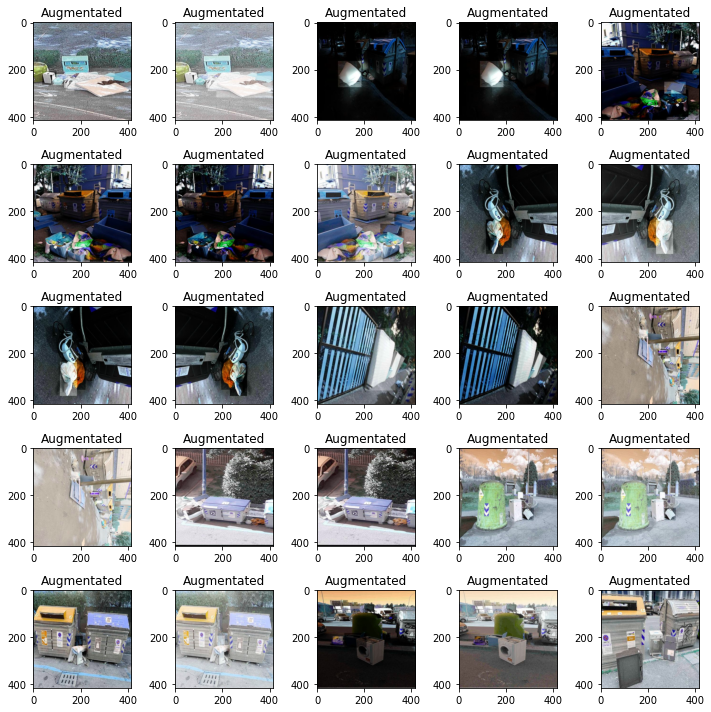

In [31]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

image_data = r"C:\Users\mistr\yolov5\cleanest_data\images\train"

for i in range(25):
    plt.subplot(5,5,i+1)# the number of images in the grid is 5*5 (25)
    image = cv2.imread(os.path.join(image_data, os.listdir(image_data)[i]))
    plt.title("Augmentated")
    plt.imshow(image)
    
plt.tight_layout()
plt.show()

#### modeling

In [32]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
# %pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init() 

YOLOv5  v6.2-142-g0171198 Python-3.10.4 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)


Setup complete  (12 CPUs, 15.8 GB RAM, 524.8/953.1 GB disk)


In [ ]:
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
import wandb
wandb.login()


In [ ]:
wandb.init(project="yolov5_test-new")

In [ ]:
# !python train.py --data data.yaml --weights yolov5m.pt --batch 8 --name Modelm_exp_1_epoch_50 --img 256 --epochs 50 --workers 8

#### Prediction

In [ ]:
!python detect.py --weights runs\train\ModelS_cleanest_3_class_exp2_epoch_1003\weights\best.pt --conf 0.7 --source "C:\Users\mistr\Downloads\garbage.v2i.yolov5pytorch\test\images" --project runs_trash --name trash_new_clean_7 --augment --line=3

In [33]:
%matplotlib inline

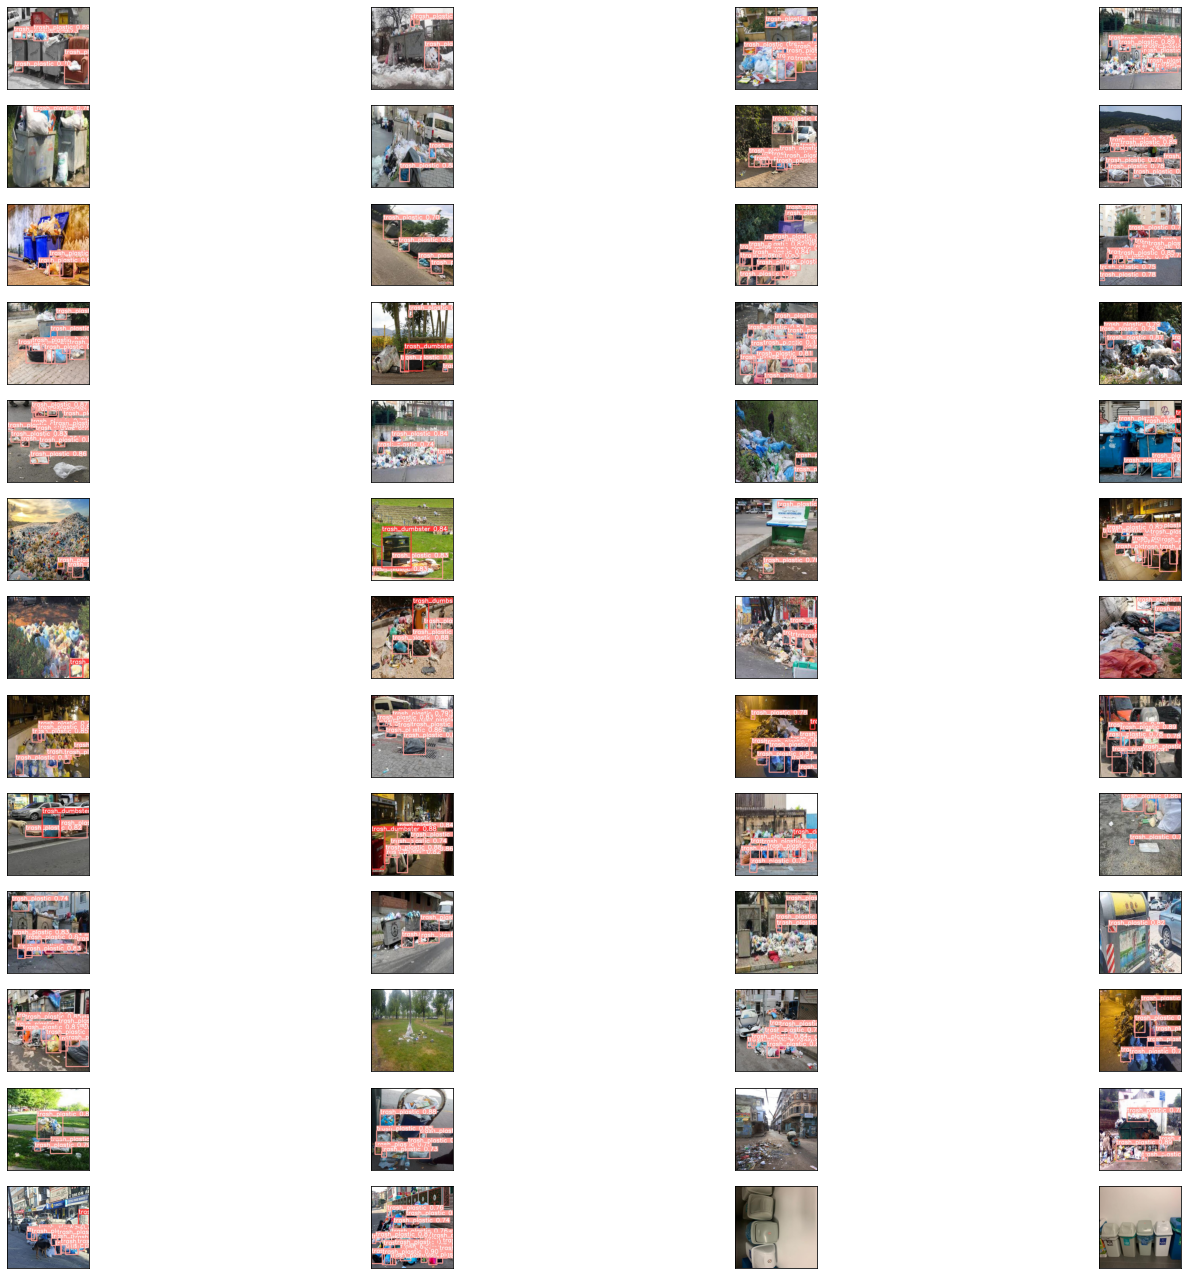

In [34]:
path = os.path.join(os.getcwd(),"runs_trash")
detect_path = os.path.join(path,"detect_test_23")

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(25,25))
columns = 4

for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

In [ ]:
##video
# !python detect.py --weights  --img 640 --conf 0.5 --source "C:\Users\mistr\Downloads\Y2Mate.is - VIDEO Pasco illegal dumping case 1337-kh1IZ_GqhZU-720p-1659539162051.mp4"

#### Model loading

In [2]:
INPUT_WIDTH = 640
INPUT_HEIGHT = 640

In [3]:
import onnx
# "C:\Users\mistr\yolov5\runs\train\cleaned_model_exp2_epoch_100\weights\best.onnx"
net_trash = cv2.dnn.readNetFromONNX(r"C:\Users\mistr\yolov5\runs\train\cleaned_model_exp2_epoch_100\weights\best.onnx")
net_trash.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net_trash.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [4]:
net_license = cv2.dnn.readNetFromONNX(r"C:\Users\mistr\yolov5\runs\train\vehicle_pretrained_exp1_epoch50\weights\best.onnx")
net_license.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net_license.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [5]:
net_human = cv2.dnn.readNetFromONNX(r"C:\Users\mistr\yolov5\crowdhuman_yolov5m.onnx")
net_human.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net_human.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

##### old files

In [ ]:
def non_maximum_supression(input_image,detections):
    # FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE
    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []
    class_ids = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting trash
        if confidence > 0.5:
#             class_score = row[5] # probability score of trash
            if class_score > 0.5:
                cx, cy , w, h = row[0:4]

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy-0.5*h)*y_factor)
                width = int(w*x_factor)
                height = int(h*y_factor)
                box = np.array([left,top,width,height])

                confidences.append(confidence)
                class_ids.argmax(class_id)
                boxes.append(box)

    # clean
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()
    # NMS
    index = np.array(cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45)).flatten()
    return boxes_np, confidences_np, index, class_ids



In [ ]:
def drawings(image,boxes_np,confidences_np,index,class_ids):
    # drawings
    print(class_ids)
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        label = "{}:{:.2f}".format(classes[class_ids[ind]], bb_conf)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),1)
        cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),1)
    return image

#### Detection

In [6]:
def get_detections(img,net):
    # CONVERT IMAGE TO YOLO FORMAT
    if img is None:
        print("No IMage")
    image = img.copy()
    row, col, d = image.shape

    max_rc = max(row,col)
    input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
    input_image[0:row,0:col] = image

    # GET PREDICTION FROM YOLO MODEL
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WIDTH,INPUT_HEIGHT),swapRB=True,crop=False)
    net.setInput(blob)
    preds = net.forward()
    detections = preds[0]
    
    return input_image, detections


In [7]:
def wrap_detection(input_image, output_data, confidences_no = 0.7):
    class_ids = []
    confidences = []
    boxes = []

    rows = output_data.shape[0]

    image_width, image_height, _ = input_image.shape

    x_factor = image_width / INPUT_WIDTH
    y_factor =  image_height / INPUT_HEIGHT

    for r in range(rows):
        row = output_data[r]
        confidence = row[4]
        if confidence >= confidences_no:

            classes_scores = row[5:]
            _, _, _, max_indx = cv2.minMaxLoc(classes_scores)
            class_id = max_indx[1]
            if (classes_scores[class_id] > .25):

                confidences.append(confidence)

                class_ids.append(class_id)
                
                x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item() 
                left = int((x - 0.5 * w) * x_factor)
                top = int((y - 0.5 * h) * y_factor)
                width = int(w * x_factor)
                height = int(h * y_factor)
                box = np.array([left, top, width, height])
                boxes.append(box)

    indexes = np.array(cv2.dnn.NMSBoxes(boxes, confidences, 0.25, 0.45)).flatten()

    result_class_ids = []
    result_confidences = []
    result_boxes = []

    for i in indexes:
        result_confidences.append(confidences[i])
        result_class_ids.append(class_ids[i])
        result_boxes.append(boxes[i])

    return result_boxes,result_confidences, indexes, result_class_ids 

In [8]:
def non_maximum_supression(input_image,detections):
    # FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE
    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting license plate
        if confidence > 0.8:
            class_score = row[5] # probability score of license plate
            if class_score > 0.5:
                cx, cy , w, h = row[0:4]

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy-0.5*h)*y_factor)
                width = int(w*x_factor)
                height = int(h*y_factor)
                box = np.array([left,top,width,height])

                confidences.append(confidence)
                boxes.append(box)

    # clean
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()
    # NMS
    index = np.array(cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45)).flatten()
    
    return boxes_np, confidences_np, index

In [9]:
def drawing_trash(image,boxes_np,confidences_np,index,class_ids, class_list):
    for(classid, confidence, box) in zip(class_ids, confidences_np, boxes_np):
        
        color = colors[int(classid) % len(colors)]
        cv2.rectangle(image, box, color, 1)
        cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
        if classid is not None and classid <= (len(class_list)-1):
            cv2.putText(image, class_list[classid] + '{:.0f}%'.format(confidence*100), (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
    return image

In [10]:
def drawing_human(image,boxes_np,confidences_np,index,class_ids, class_list):
    for(classid, confidence, box) in zip(class_ids, confidences_np, boxes_np):
            if classid == 0:
                color = colors[int(classid) % len(colors)]
                cv2.rectangle(image, box, color, 1)
                cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
                cv2.putText(image, class_list[classid] + '{:.0f}%'.format(confidence*100), (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
                return image
            else: 
                return image

In [11]:
def extract_text(image,bbox):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x,y,w,h = bbox
    roi = img_rgb[y:y+h, x:x+w]
    roi_image = image[y:y+h, x:x+w]
    gray = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
    sharpen_kernel = np.array([[0,-1,0], [-1,8,-1], [0,-1,0]])
    sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
    thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    plt.subplot(1,2,1)
    plt.imshow(sharpen)
    plt.subplot(1,2,2)
    plt.imshow(roi)
    plt.show()
    if 0 in roi.shape:
        return ''
    else:
#         plt.imshow(roi)
#         text = pt.image_to_string(thresh,lang ='eng',config ='--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
        text = pt.image_to_string(thresh, lang='eng', config ='--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
        text = text.strip()
        return text

In [12]:
cap_arr = []
def drawing_plate(image,boxes_np,confidences_np,index):
    # drawings
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        conf_text = 'plate: {:.0f}%'.format(bb_conf*100)
        license_text = extract_text(image,boxes_np[ind])
        cap_arr.append(license_text)
    
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.rectangle(image,(x,y-30),(x+w,y),(255,0,255),-1)
#         cv2.rectangle(image,(x,y+h),(x+w,y+h+30),(0,0,0),-1)

        cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)
#         cv2.putText(image,license_text,(x,y+h+27),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),1)

    return image

In [13]:
#### trash_detection
colors = [(255, 255, 0), (0, 255, 0), (0, 255, 255), (255, 0, 0)]

def yolo_predictions_trash(img,net=net_trash):
    ## step-1: detections
    class_list_trash = ["boxes","1","garbage-bag"]
#     class_list_trash = ['cardboard', 'garbage_bag', "Rubber", "Washing-machine","Wood","Mattress","Furniture","Pallet","Bucket", "Chair"]
    input_image, detections = get_detections(img,net)
    ## step-2: NMS
    boxes_np, confidences_np, index,class_ids = wrap_detection(input_image, detections)
    ## step-3: Drawings
    result_img = drawing_trash(img,boxes_np,confidences_np,index, class_ids, class_list_trash)
    return result_img

In [14]:
def yolo_predictions_human(img,net=net_trash):
    ## step-1: detections
    class_list_human = ["human","head"]
#     class_list_trash = ['cardboard', 'garbage_bag', "Rubber", "Washing-machine","Wood","Mattress","Furniture","Pallet","Bucket", "Chair"]
    input_image, detections = get_detections(img,net)
    ## step-2: NMS
    conf_no = 0.8
    boxes_np, confidences_np, index,class_ids = wrap_detection(input_image, detections, conf_no)
    ## step-3: Drawings
    result_img = drawing_human(img,boxes_np,confidences_np,index, class_ids, class_list_human)
    return result_img

In [15]:
def yolo_predictions_licensePlate(img,net = net_license):
    class_list_license = ["Plate"]
    ## step-1: detections
    input_image, detections = get_detections(img,net)
    ## step-2: NMS
    boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)
    ## step-3: Drawings
    result_img = drawing_plate(img,boxes_np,confidences_np,index)
    return result_img

#### Day image

In [16]:
img = cv2.imread(r"C:\Users\mistr\OneDrive\Desktop\test_img_1.jpg")
# classes = ["Dumbster", "trash"]
result_trash = yolo_predictions_trash(img,net_trash)
result_human = yolo_predictions_human(img, net_human)

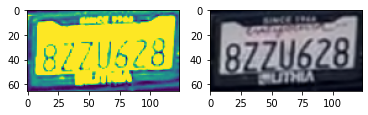

In [17]:
result_licensePlate = yolo_predictions_licensePlate(img,net_license)

In [18]:
cv2.namedWindow('results',cv2.WINDOW_KEEPRATIO)
cv2.imshow('results',result_trash)
cv2.imshow('results', result_licensePlate)
cv2.imshow("results", result_human)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cap_arr

#### Under working 

In [ ]:
img = cv2.imread(r"C:\Users\mistr\OneDrive\Desktop\night_test.jpg")
# classes = ["Dumbster", "trash"]
result_trash = yolo_predictions_trash(img,net_trash)
result_licensePlate = yolo_predictions_licensePlate(img,net_license)

In [ ]:
cv2.namedWindow('results',cv2.WINDOW_KEEPRATIO)
cv2.imshow('results',result_trash)
cv2.imshow('results', result_licensePlate)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cap_arr

#### Upload video

In [ ]:
# test= "C:/Users/mistr/Downloads/test_video_combine.mp4"
cap = cv2.VideoCapture(r"C:\Users\mistr\Downloads\IMG_9574_Trim.mp4")
cap.set(cv2.CAP_PROP_FPS, 20)
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter.fourcc('M', 'J', 'P', 'G'))

In [ ]:
start = time.time_ns()
frame_count = 0
total_frames = 0
fps = -1

In [ ]:
if (cap.isOpened() == False): 
    print("Error reading video file")
  
# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)
   
# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

In [ ]:
while True:
    ret, frame = cap.read()
    
    if ret == False:
        print('unable to read video')
        break
    
    
    frame_count += 1
    total_frames += 1000000000    
    
    
    result_Video_trash = yolo_predictions_trash(frame,net_trash)
    result_Video_Plate = yolo_predictions_licensePlate(frame, net_license)
    result_Video_human = yolo_predictions_human(frame, net_human) 
    end = time.time_ns()
    fps = 1000000000 * frame_count / (end - start)
    frame_count = 0
    start = time.time_ns()
        
        
    if fps > 0:
        fps_label = "FPS: %.2f" % fps
        cv2.putText(frame, fps_label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    result.write(frame)
    cv2.namedWindow('YOLOv5',cv2.WINDOW_KEEPRATIO)
    cv2.imshow('YOLOv5',result_Video_trash)
    cv2.imshow('YOLOv5', result_Video_Plate)
    if cv2.waitKey(1) == 27:
        print("finished by user")
        break
        
cap.release()   
result.release()
cv2.destroyAllWindows()


In [ ]:
cap_arr

#### DEEP SORT

In [ ]:
%cd ..

In [ ]:
%cd Yolov5_StrongSORT_OSNet/

In [ ]:
from yolov5 import utils
display = utils.notebook_init() 

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python track.py --source clean_test.mp4 --save-vid  --yolo-weights yolov5/weights/classes_3_exp2.pt --strong-sort-weights osnet_x0_25_msmt17.pt